In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from natsort import natsort
%matplotlib inline


In [2]:
list_dir = os.listdir('camera_cal/')
list_dir = [x for x in list_dir if 'calibration' in x]
list_dir = natsort(list_dir)

In [3]:
print (list_dir)

['calibration1.jpg', 'calibration2.jpg', 'calibration3.jpg', 'calibration4.jpg', 'calibration5.jpg', 'calibration6.jpg', 'calibration7.jpg', 'calibration8.jpg', 'calibration9.jpg', 'calibration10.jpg', 'calibration11.jpg', 'calibration12.jpg', 'calibration13.jpg', 'calibration14.jpg', 'calibration15.jpg', 'calibration16.jpg', 'calibration17.jpg', 'calibration18.jpg', 'calibration19.jpg', 'calibration20.jpg']


Processing image calibration1.jpg...
Corners found at nx:9, ny:5
Processing image calibration2.jpg...
Corners found at nx:8, ny:6
Processing image calibration3.jpg...
Corners found at nx:9, ny:6
Processing image calibration4.jpg...
Corners found at nx:6, ny:5
Processing image calibration5.jpg...
Corners found at nx:7, ny:5
Processing image calibration6.jpg...
Corners found at nx:9, ny:6
Processing image calibration7.jpg...
Corners found at nx:9, ny:6
Processing image calibration8.jpg...
Corners found at nx:9, ny:6
Processing image calibration9.jpg...
Corners found at nx:9, ny:6
Processing image calibration10.jpg...
Corners found at nx:9, ny:6
Processing image calibration11.jpg...
Corners found at nx:9, ny:6
Processing image calibration12.jpg...
Corners found at nx:9, ny:6
Processing image calibration13.jpg...
Corners found at nx:9, ny:6
Processing image calibration14.jpg...
Corners found at nx:8, ny:6
Processing image calibration15.jpg...
Corners found at nx:6, ny:5
Processing image ca

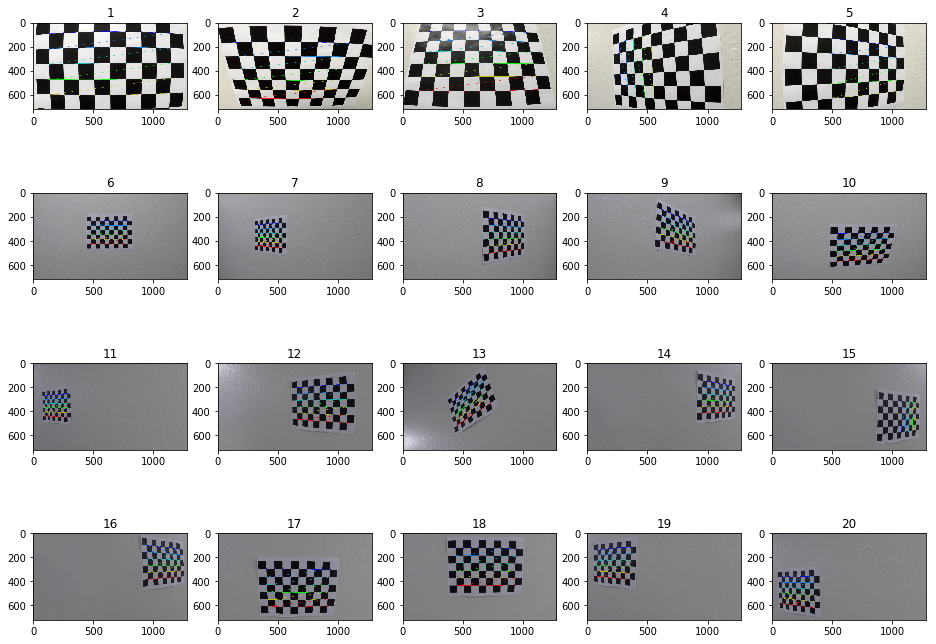

True Count: 20
False Count: 0


In [7]:
true_count = 0
false_count = 0
plt.figure(figsize=(16,12))
imgpoints = []
objpoints = []
for x, image in enumerate(list_dir):
    print('Processing image {}...'.format(image))
    found = False
#     for ny in [5,6]:
    for ny in [6]:
#         for nx in [6,7,8,9]:
        for nx in [9]
#             print('Processing nx:{}, ny:{}'.format(nx, ny))
            objp = np.zeros((ny * nx, 3), np.float32)
            objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
            img = mpimg.imread('camera_cal/' + image)
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
            plt.subplot(4, 5, x + 1)
            plt.title(x+1)
            if ret:
                print('Corners found at nx:{}, ny:{}'.format(nx, ny))
                true_count += 1
                imgpoints.append(corners)
                objpoints.append(objp)
#                 print('Corners exists!')
                img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                plt.imshow(img)
                found = True
            else:
#                 print("Can't find corners...")
#                 false_count += 1
                blank = np.zeros([720, 1280, 3])
                plt.imshow(blank)
            if found == True:
                break
        if found == True:
            break
    if found == False:
        print('No corners were found!')
        false_count += 1
print("{} out of {} images found corners!".format(true_count, true_count+false_count))
plt.show()   
print("True Count: {}".format(true_count))
print("False Count: {}".format(false_count))

In [8]:
print (np.array(imgpoints).shape)
print (np.array(objpoints).shape)

(20,)
(20,)


[[-0.28003665  0.18635168 -0.00189788  0.00043553 -0.34318961]]
[[  1.15683668e+03   0.00000000e+00   6.73575937e+02]
 [  0.00000000e+00   1.15381343e+03   3.93409888e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


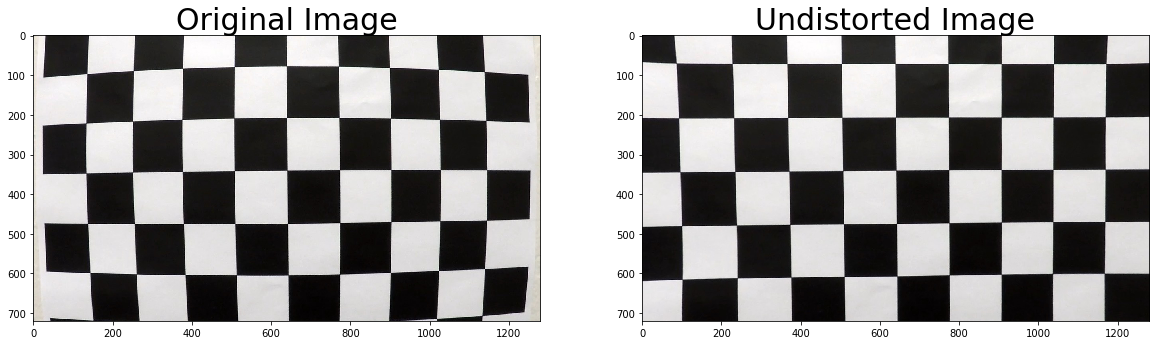

[[-0.28003665  0.18635168 -0.00189788  0.00043553 -0.34318961]]
[[  1.15683668e+03   0.00000000e+00   6.73575937e+02]
 [  0.00000000e+00   1.15381343e+03   3.93409888e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


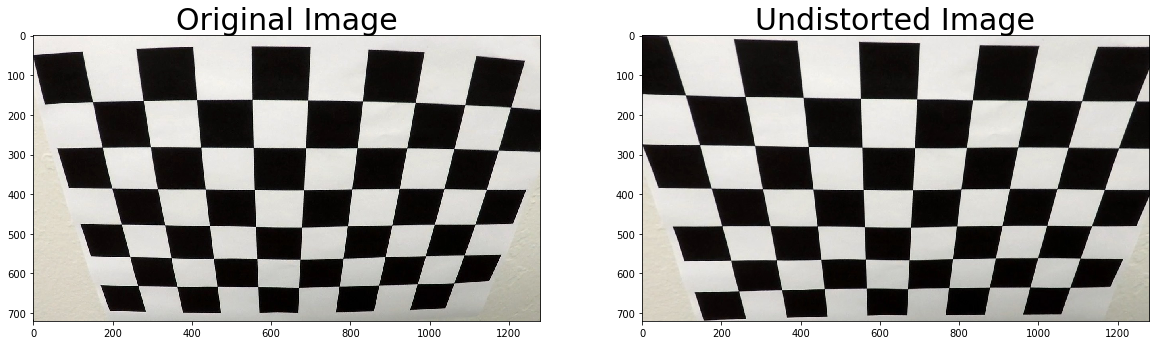

[[-0.28003665  0.18635168 -0.00189788  0.00043553 -0.34318961]]
[[  1.15683668e+03   0.00000000e+00   6.73575937e+02]
 [  0.00000000e+00   1.15381343e+03   3.93409888e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


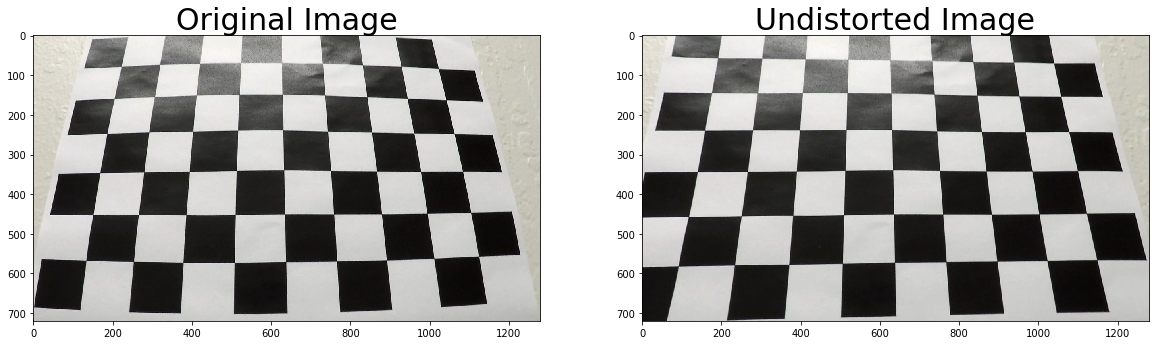

[[-0.28003665  0.18635168 -0.00189788  0.00043553 -0.34318961]]
[[  1.15683668e+03   0.00000000e+00   6.73575937e+02]
 [  0.00000000e+00   1.15381343e+03   3.93409888e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


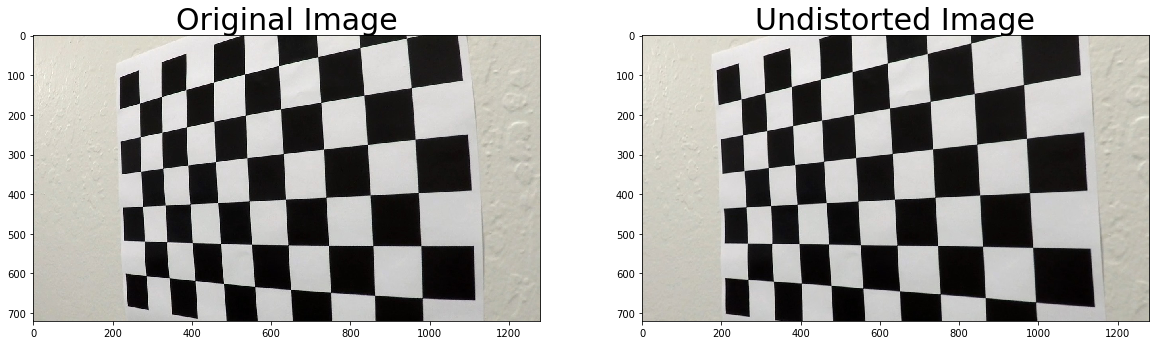

[[-0.28003665  0.18635168 -0.00189788  0.00043553 -0.34318961]]
[[  1.15683668e+03   0.00000000e+00   6.73575937e+02]
 [  0.00000000e+00   1.15381343e+03   3.93409888e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


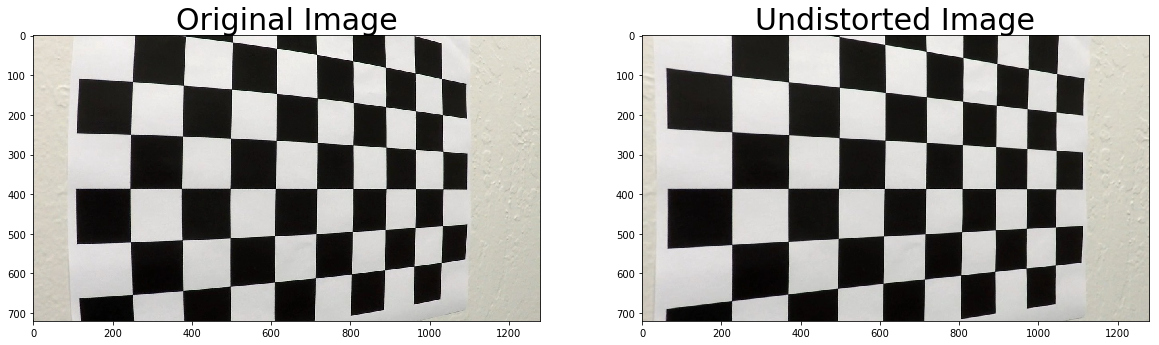

In [9]:
# Test undistortion on an image
for image in list_dir[:5]:
    img = mpimg.imread('camera_cal/' + image.strip())
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
#     plt.text(0, 0, '{}\n{}'.format(dist, mtx))
    print ('{}\n{}'.format(dist, mtx))
    plt.show()

In [10]:
# Save the dist, mtx
calibration = {}
calibration["mtx"] = mtx
calibration["dist"] = dist
pickle.dump(calibration, open( "calibration.p", "wb" ) )

In [11]:
test_dir = natsort(os.listdir('test_images'))

straight_lines1.jpg


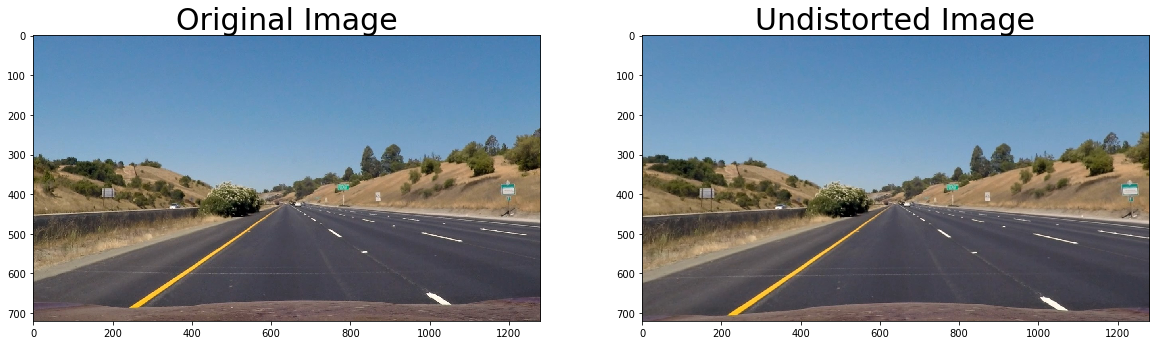

straight_lines2.jpg


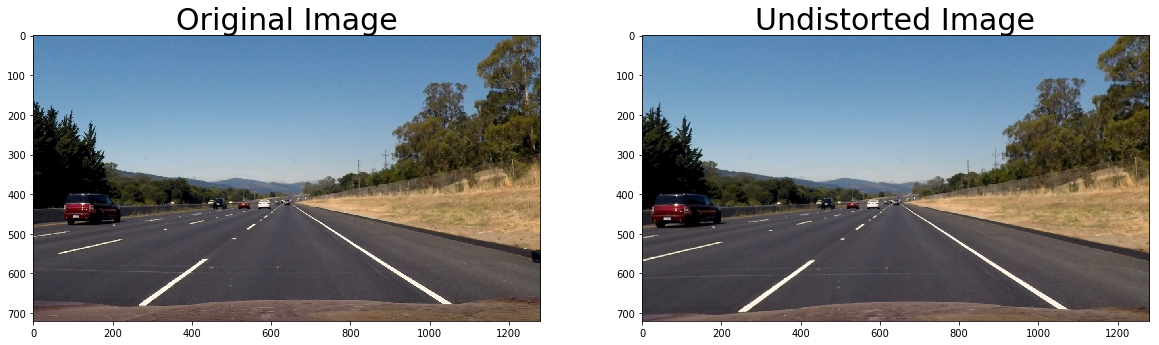

test1.jpg


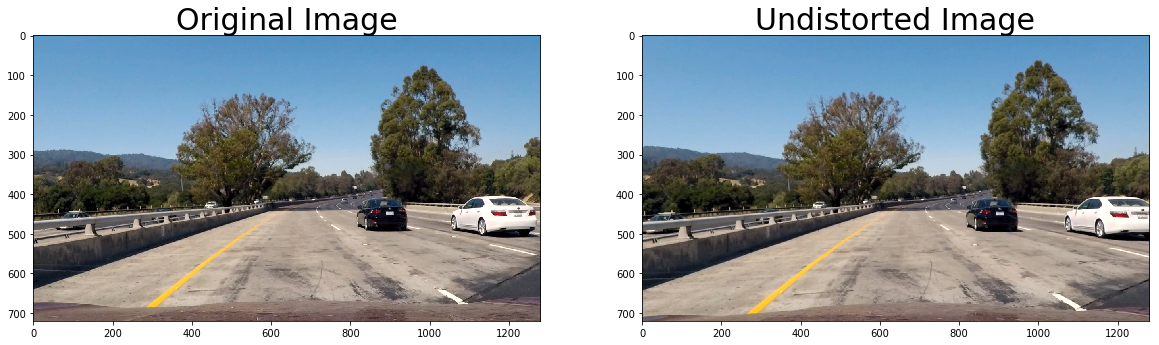

test2.jpg


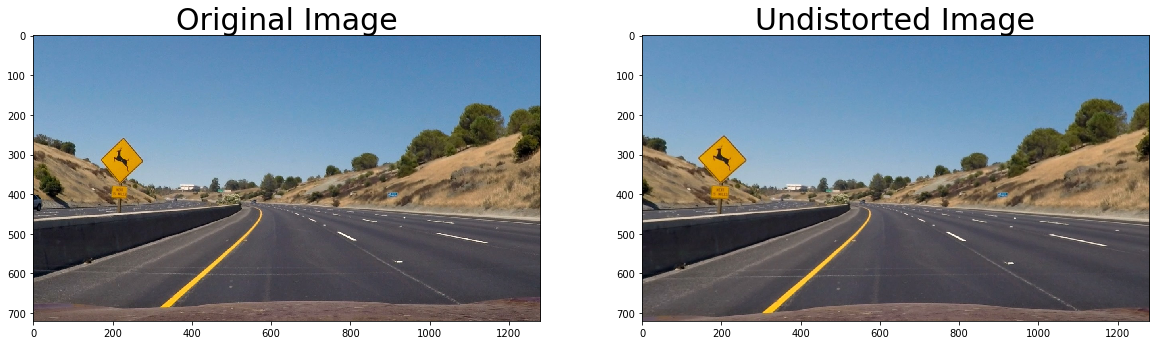

test3.jpg


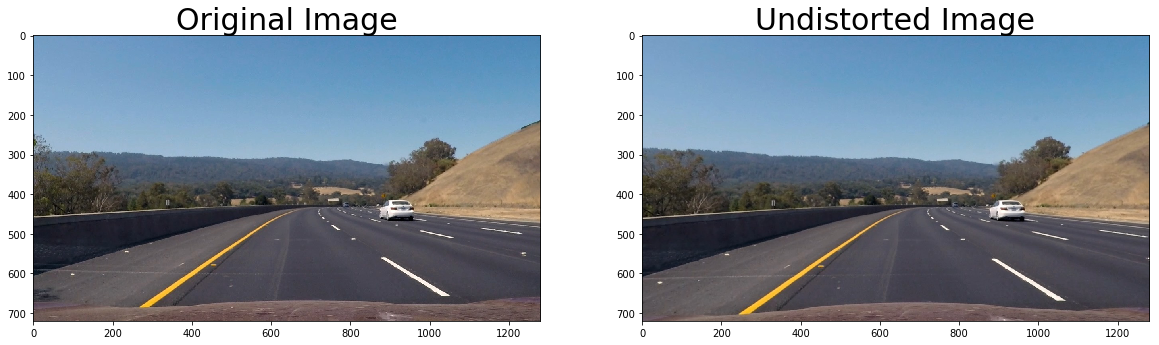

test4.jpg


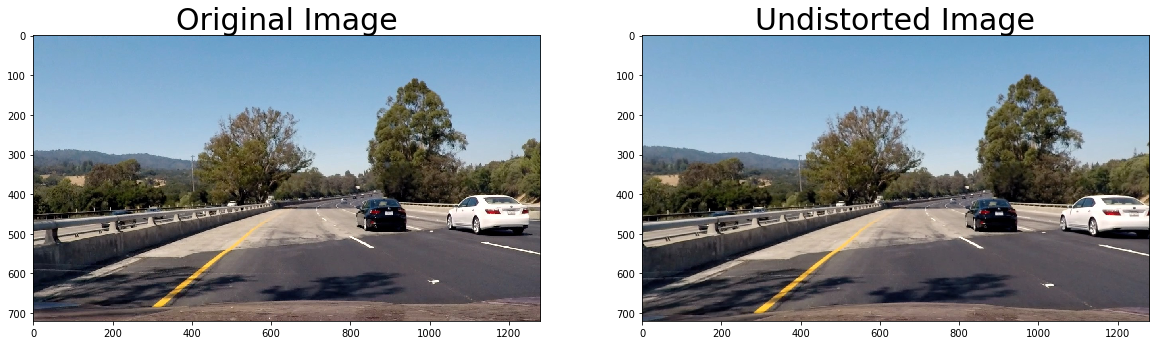

test5.jpg


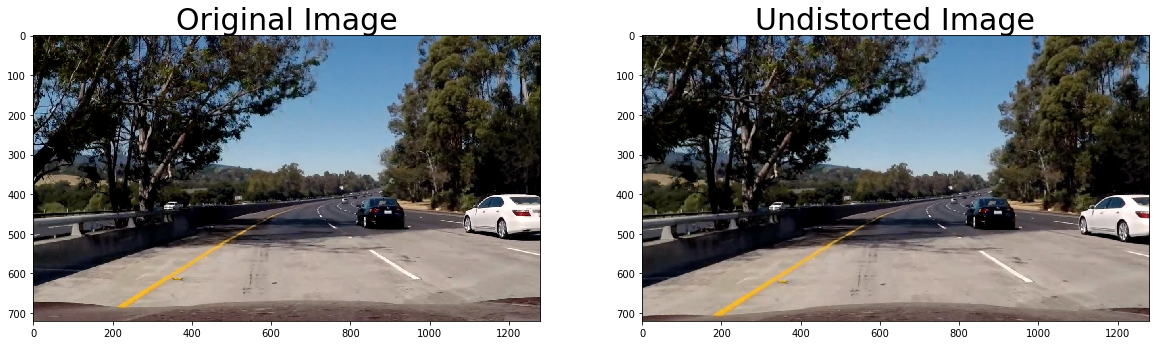

test6.jpg


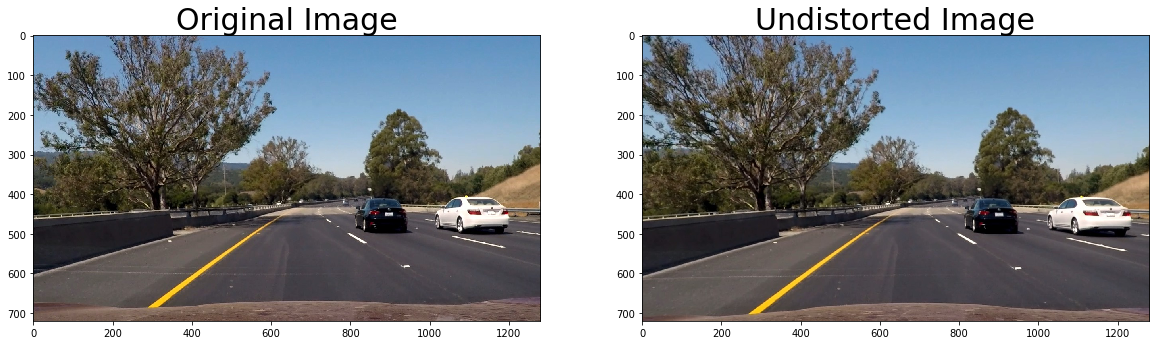

In [18]:
for image in test_dir:
    img = mpimg.imread('test_images/'+image.strip())
    img_size = (img.shape[1], img.shape[0])
    
    undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(undistorted_img)
    ax2.set_title('Undistorted Image', fontsize=30)
#     plt.text(0, 0, '{}\n{}'.format(dist, mtx))
    print (image)
    plt.show()